In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ssl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
df.shape

(53940, 10)

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.dropna(inplace=True)

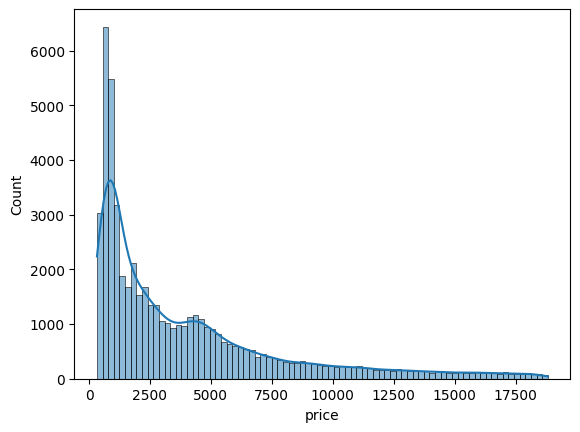

In [ ]:
# Distribution of diamond prices
sns.histplot(data=df, x='price', kde=True)
plt.show()

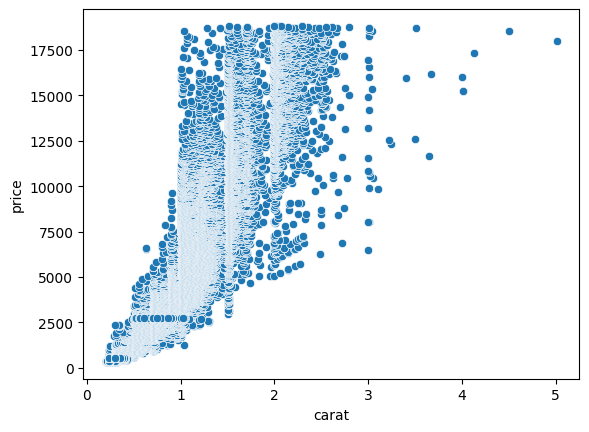

In [ ]:
# Scatter plot of carat vs price
sns.scatterplot(data=df, x='carat', y='price')
plt.show()

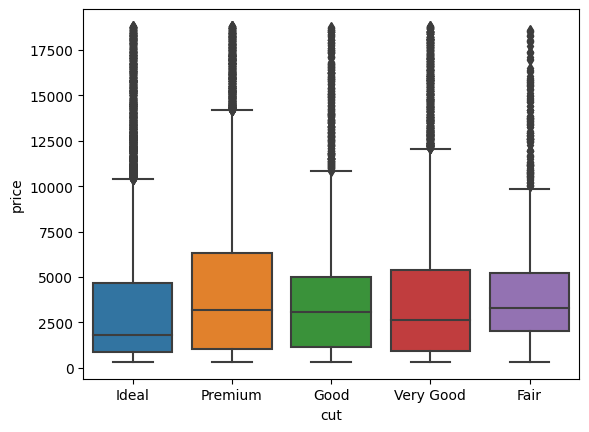

In [ ]:
# Box plot of price by cut
sns.boxplot(data=df, x='cut', y='price')
plt.show()

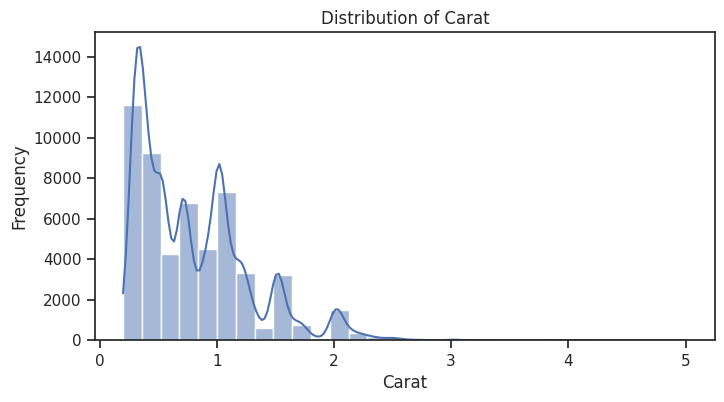

In [ ]:

# Univariate analysis for 'carat' column
plt.figure(figsize=(8, 4))
sns.histplot(df['carat'], bins=30, kde=True)
plt.title('Distribution of Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()


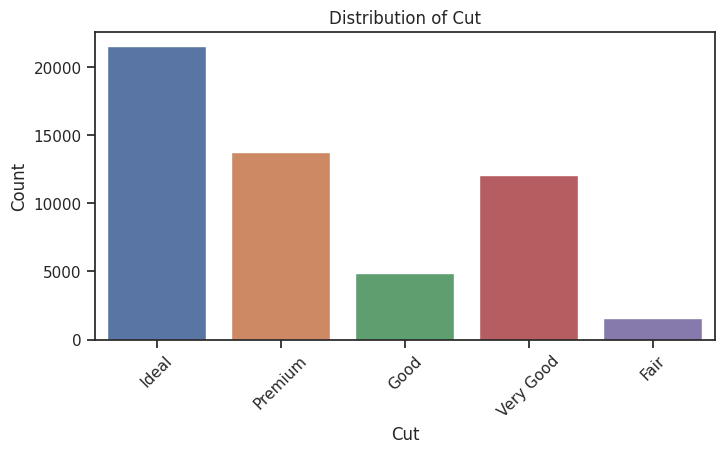

In [ ]:
# Univariate analysis for 'cut' column
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='cut')
plt.title('Distribution of Cut')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



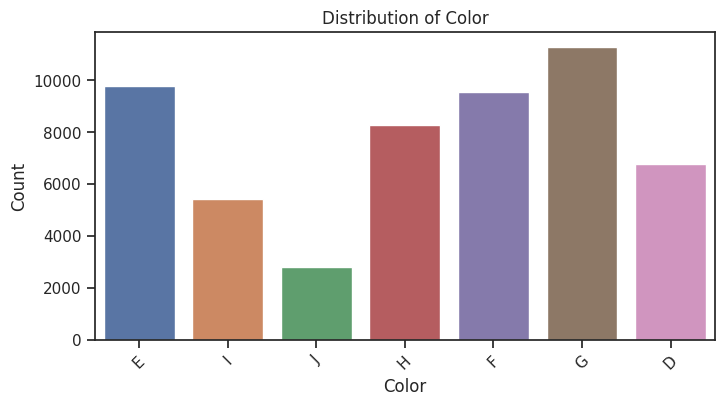

In [ ]:
# Univariate analysis for 'color' column
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='color')
plt.title('Distribution of Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

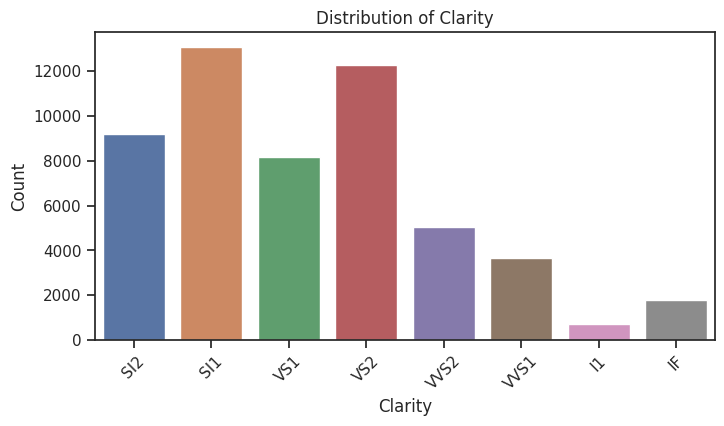

In [ ]:
# Univariate analysis for 'clarity' column
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='clarity')
plt.title('Distribution of Clarity')
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


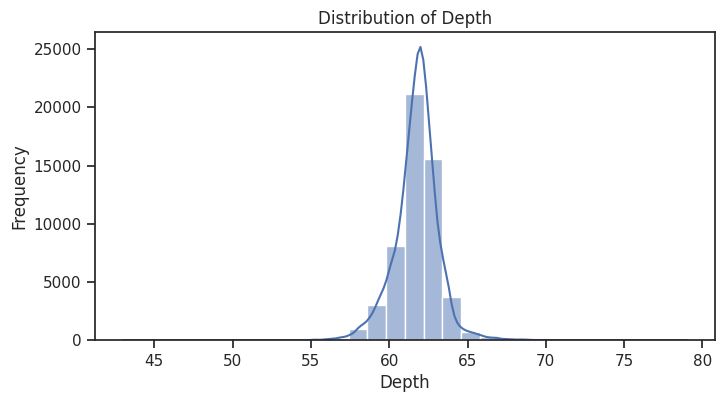

In [ ]:
# Univariate analysis for 'depth' column
plt.figure(figsize=(8, 4))
sns.histplot(df['depth'], bins=30, kde=True)
plt.title('Distribution of Depth')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.show()


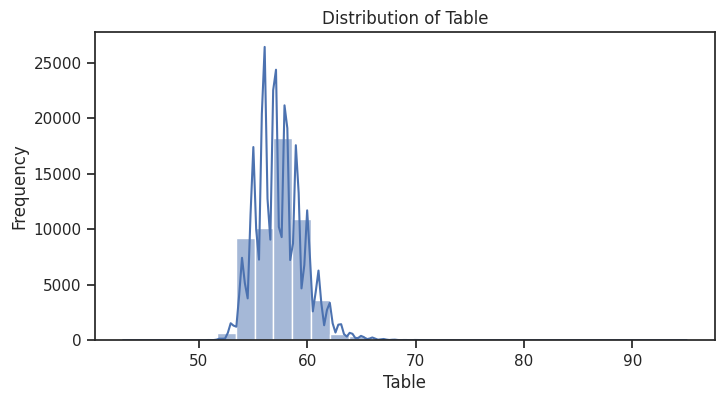

In [ ]:

# Univariate analysis for 'table' column
plt.figure(figsize=(8, 4))
sns.histplot(df['table'], bins=30, kde=True)
plt.title('Distribution of Table')
plt.xlabel('Table')
plt.ylabel('Frequency')
plt.show()

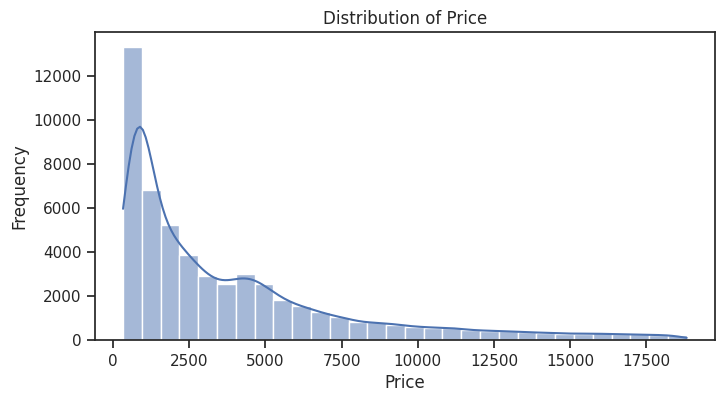

In [ ]:
# Univariate analysis for 'price' column
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

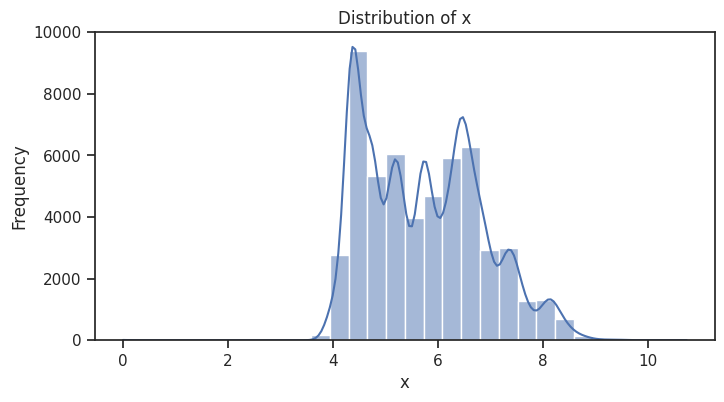

In [ ]:
# Univariate analysis for 'x' column
plt.figure(figsize=(8, 4))
sns.histplot(df['x'], bins=30, kde=True)
plt.title('Distribution of x')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()


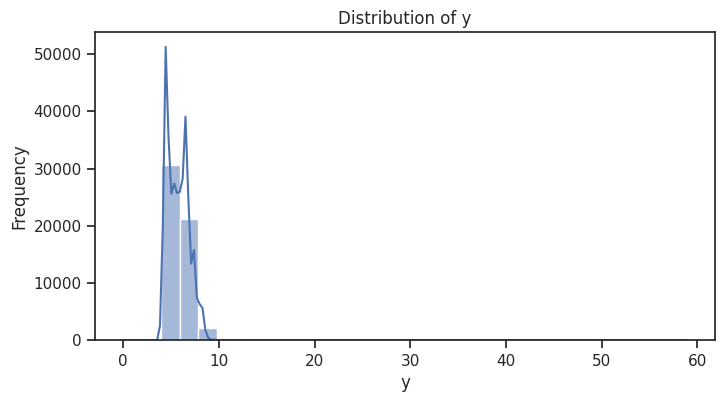

In [ ]:
# Univariate analysis for 'y' column
plt.figure(figsize=(8, 4))
sns.histplot(df['y'], bins=30, kde=True)
plt.title('Distribution of y')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.show()

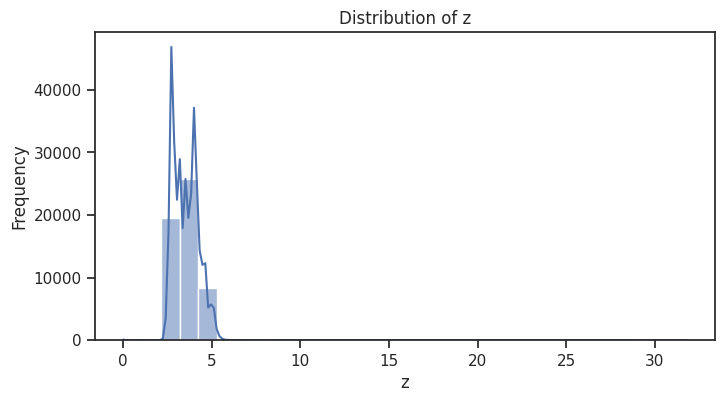

In [ ]:
# Univariate analysis for 'z' column
plt.figure(figsize=(8, 4))
sns.histplot(df['z'], bins=30, kde=True)
plt.title('Distribution of z')
plt.xlabel('z')
plt.ylabel('Frequency')
plt.show()


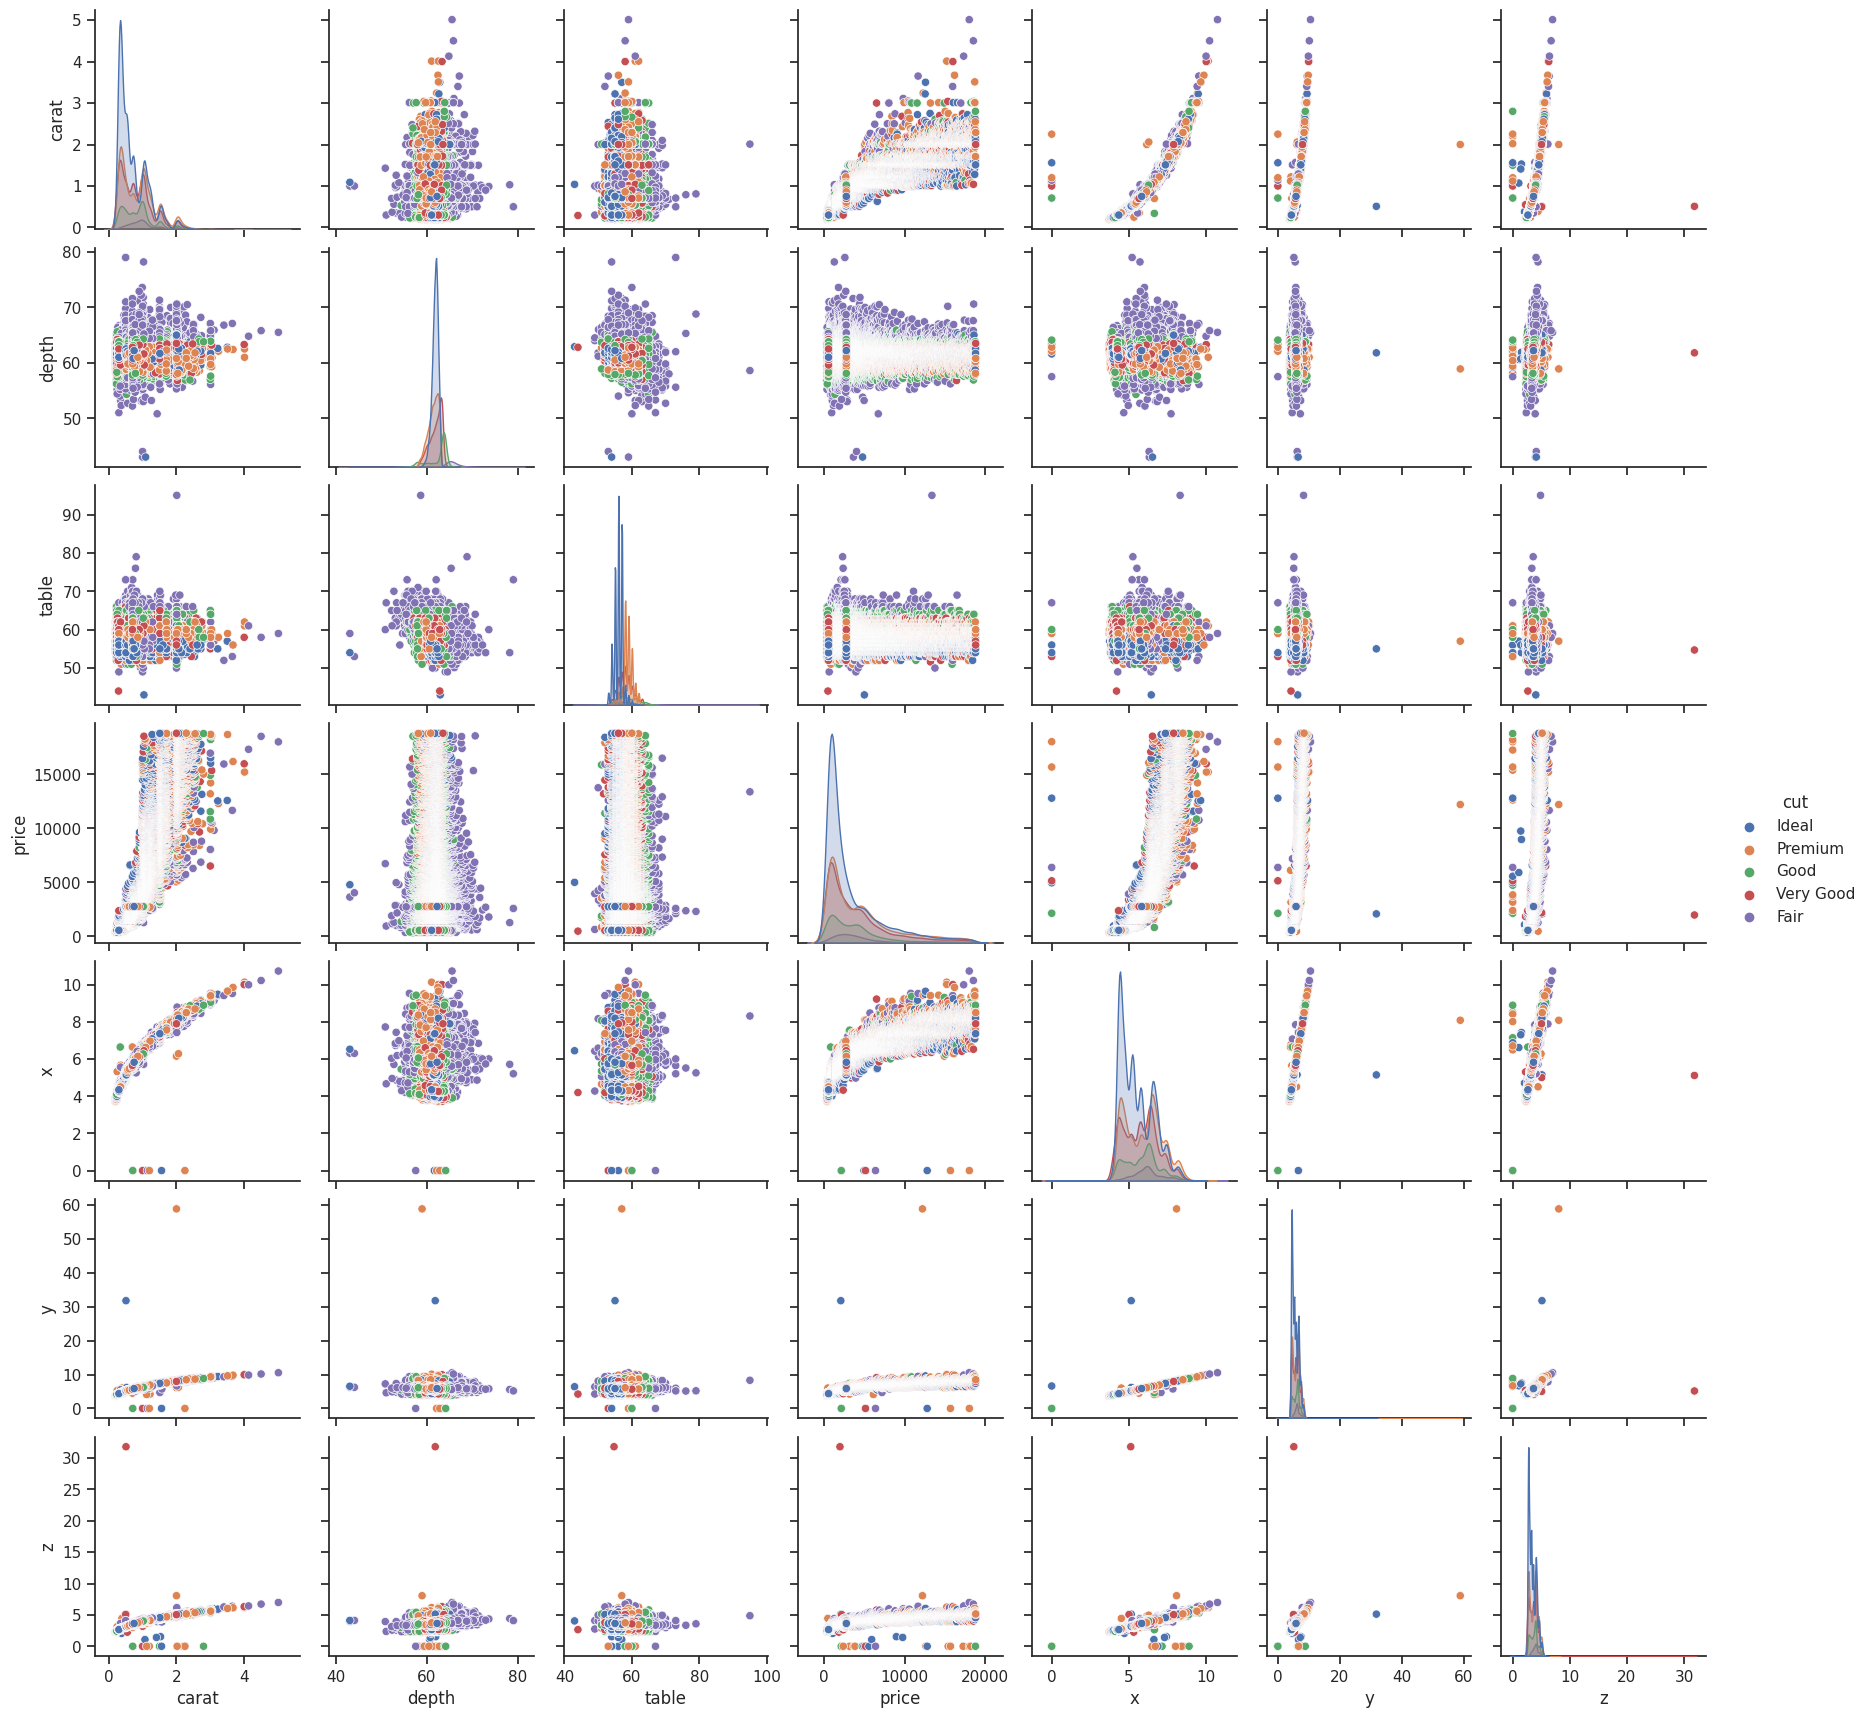

In [ ]:
# Select the columns you want to include in the pair plot
columns_to_plot = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

# Create a DataFrame with only the selected columns
subset_df = df[columns_to_plot]

# Create a pair plot
sns.pairplot(subset_df, hue='cut')
plt.show()



In [ ]:
X = df.drop('price', axis=1)
y = df['price']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
model= RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
categorical_features = ['cut', 'color', 'clarity']
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])


In [ ]:
# Combine preprocessing with model in a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model',RandomForestRegressor ())])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mse_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = mse_scores ** 0.5

In [ ]:
print(f'Cross-Validation RMSE Scores: {rmse_scores}')
print(f'Mean CV RMSE: {rmse_scores.mean()}')


Cross-Validation RMSE Scores: [594.34126458 682.44378459 651.17144103 609.36876954 632.10138207]
Mean CV RMSE: 633.8853283615508


In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model', RandomForestRegressor())])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Test Set RMSE: {rmse}')


Test Set RMSE: 629.2397891812883


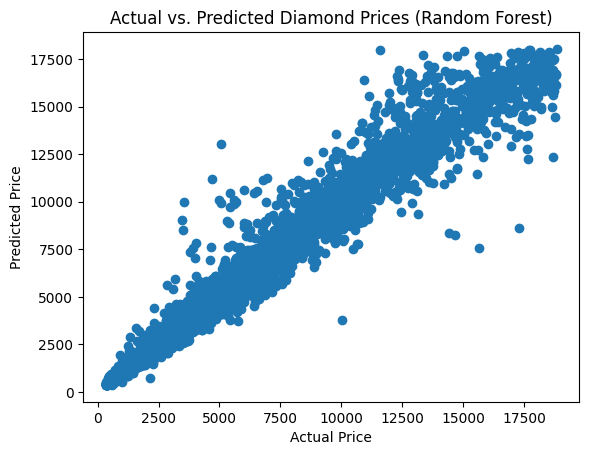

In [ ]:
# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Diamond Prices (Random Forest)')
plt.show()